Import the libraries


In [21]:
import io
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
embedding_layer = layers.Embedding(1000, 5)

result = embedding_layer(tf.constant([1, 2, 3]))

print(result.numpy())
print(result.numpy().shape)

[[ 0.01393061 -0.01349699  0.01690643  0.02659626  0.03795633]
 [-0.01465865 -0.01017161 -0.01436748  0.02751834  0.0225844 ]
 [ 0.00222374 -0.04009968  0.00305971 -0.00408781  0.03449622]]
(3, 5)


In [4]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split= (tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info = True, as_supervised = True)

encoder = info.features['text'].encoder
print(encoder.subwords[:20])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCRYPV2/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCRYPV2/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteCRYPV2/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [5]:
padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

In [8]:
embedding_dim = 16

model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')
                          
                          ])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(train_batches, epochs = 10, validation_data = test_batches, validation_steps = 20)



Epoch 1/10
2500/2500 [==============================] - 12s 4ms/step - loss: 0.6346 - accuracy: 0.6926 - val_loss: 0.5618 - val_accuracy: 0.8100
Epoch 2/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.4639 - accuracy: 0.8387 - val_loss: 0.4537 - val_accuracy: 0.8450
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3608 - accuracy: 0.8807 - val_loss: 0.4008 - val_accuracy: 0.8450
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3071 - accuracy: 0.8962 - val_loss: 0.3833 - val_accuracy: 0.8300
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2744 - accuracy: 0.9072 - val_loss: 0.4088 - val_accuracy: 0.8250
Epoch 6/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2498 - accuracy: 0.9164 - val_loss: 0.3761 - val_accuracy: 0.8450
Epoch 7/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2285 - accuracy: 0.9222 - val_loss: 0.2881 - val_ac

In [10]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

(0.5, 1.0)

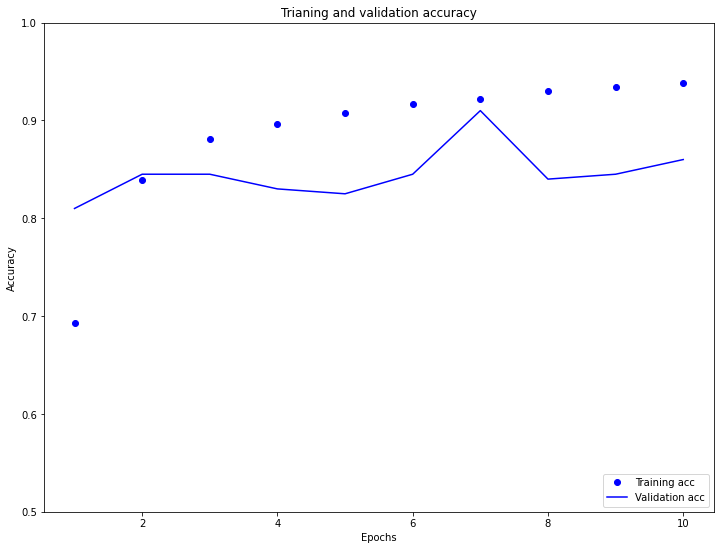

In [11]:
plt.figure(figsize = (12, 9))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trianing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim((0.5, 1))

In [20]:
def get_batch_data():
  (train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split= (tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info = True, as_supervised = True)
  padded_shapes = ([None], ())
  train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
  test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
  return train_batches, test_batches, encoder

def get_model(encoder):
  embedding_dim = 16
  model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')
                          
                          ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  history = model.fit(train_batches, epochs = 10, validation_data = test_batches, validation_steps = 20)
  return model

def plot_history(history):
  history_dict = history.history
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.figure(figsize = (12, 9))
  plt.plot(epochs, acc, 'bo', label = 'Training acc')
  plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
  plt.title('Trianing and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'lower right')
  plt.ylim((0.5, 1))
  plt.show()

def retrieve_embeddings(model, encoder):
  out_vectors = io.open('vecs.tsv', 'w', encoding='utf-8')
  out_metadata = io.open('meta.tsv', 'w', encoding= 'utf-8')
  weights = model.layers[0].get_weights()[0]

  for num, word in enumerate(encoder.subwords):
    vec = weights[num + 1]
    out_metadata.write(word + '\n')
    out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')
  out_vectors.close()
  out_metadata.close()

train_batches, test_batches, encoder = get_batch_data()
model = get_model(encoder)
history = model.fit(train_batches, epochs = 10, validation_data= test_batches,
                    validation_steps = 20)
#plot_history(history)
retrieve_embeddings(model, encoder)

Epoch 1/10
2500/2500 [==============================] - 12s 4ms/step - loss: 0.6313 - accuracy: 0.6987 - val_loss: 0.5389 - val_accuracy: 0.7850
Epoch 2/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.4560 - accuracy: 0.8431 - val_loss: 0.4407 - val_accuracy: 0.8400
Epoch 3/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3538 - accuracy: 0.8820 - val_loss: 0.4177 - val_accuracy: 0.8650
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3022 - accuracy: 0.8976 - val_loss: 0.3515 - val_accuracy: 0.8700
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2695 - accuracy: 0.9096 - val_loss: 0.2626 - val_accuracy: 0.8900
Epoch 6/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2453 - accuracy: 0.9187 - val_loss: 0.3047 - val_accuracy: 0.8950
Epoch 7/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2249 - accuracy: 0.9244 - val_loss: 0.3694 - val_ac